# Baseline Wander Filtering Via High Pass Filter

#### We have used the high pass filter built-in function from MATLAB to eliminate baseline noise from ecg signals.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matlab.engine


In [8]:
eng = matlab.engine.start_matlab()  # creates a MATLAB session

data = pd.read_csv('https://raw.githubusercontent.com/team-emotion/emotion_recognition/master/datasets/s01_video01.csv', header=None)
data.columns = ["ecg","gsr","temp","hr","spo2","timest"]
data_split = np.array_split(data,6)

ecg = data_split[0].loc[:,'ecg'].tolist()
timestamp = data_split[0].loc[:,'timest'].tolist()
rcParams['figure.figsize'] = 25.5, 10.5



In [294]:
ecg_mat = eng.cell2mat(ecg)
ecg_filtered = eng.highpass(ecg_mat,10,1e3)
ecg_list = eng.mat2cell(ecg_filtered,1,18938)
npa = np.asarray(ecg_list)
npa = np.reshape(npa,(18938,1))

Text(0.5, 0, 'timestamp')

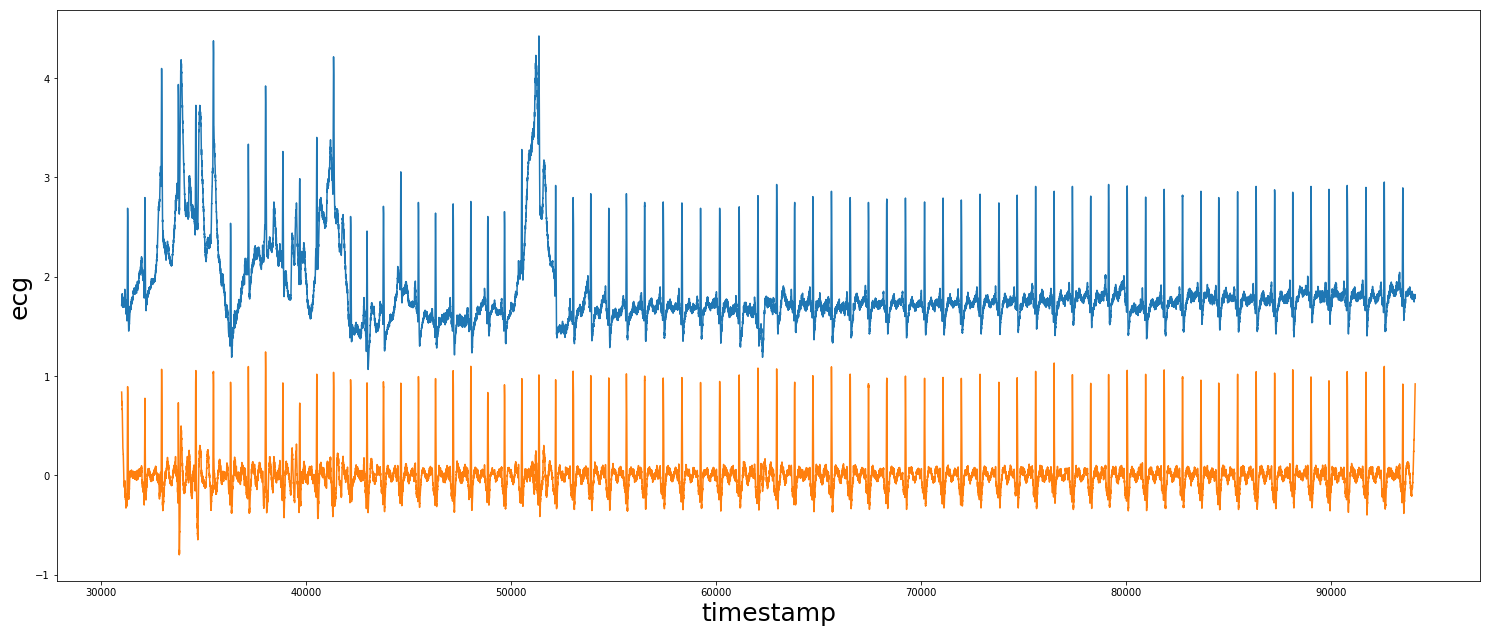

In [295]:
plt.plot(timestamp,ecg)
plt.plot(timestamp,npa)
plt.ylabel('ecg',fontsize=25)
plt.xlabel('timestamp',fontsize=25)